# Simple Linear Regression

problem statement:

Build a predictive linear regression model for given dataset, given humidity predict apparent temperature
https://drive.google.com/open?id=1WsJxbsh51SL1UhT0xEvNynZTKy4nOwLM

In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing pandas 
import pandas as pd
#importing seaborn
import seaborn as sea
#importing numpy
import numpy as np
#importing math module
import math
# loading csv data from the file given in the url
weather_data = pd.read_csv("weatherHistory.csv")
#prinding info of data
weather_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


### splitting train and test data

In [2]:
#extracting humididty and temperature column from data set
index=70000
humidity = weather_data['Humidity']
train_humidity =np.array(humidity[:index])
temperature = np.array(weather_data['Temperature (C)'])
train_temperature = temperature[:index]

test_humidity = np.array(humidity[index+1:])
test_temp = np.array(temperature[index+1:])

In [3]:
#checking null values in humidity and temperature
#checking for null values in data set
weather_data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [4]:
train_humidity

array([0.89, 0.86, 0.89, ..., 0.83, 0.93, 0.91])

In [5]:
#obtaining mean of temp and humidity
mean_hum=train_humidity.mean()
mean_temp= train_temperature.mean()

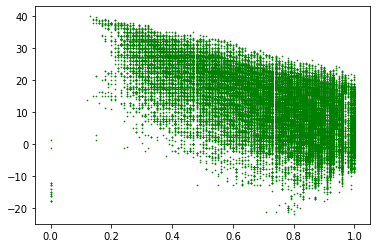

In [6]:
#plotting humoidity and temp
plt.scatter(train_humidity,train_temperature,s=0.4,color='g')

### making regression model

In [7]:
#appending en extra row into train set just to do the matrix multiplication
extra_row = np.ones(len(train_humidity))
train_humidity = np.vstack([extra_row,train_humidity])

In [8]:
train_humidity[1]

array([0.89, 0.86, 0.89, ..., 0.83, 0.93, 0.91])

In [9]:
#function returns the derivative of cost function which will help in minimizing cost function
def derivative_cost_function(variation,row):
    #taking length of training set
    length=70000
    return ( variation.dot(train_humidity[row]))  /length

In [10]:
#this function returns the value of parameters
# that is intercept and slope value for drawing regression line
def obtain_parameters():
    #initializing theta to zero 
    #both slope and y intercept
    theta = np.array([0.0,0.0])
    #learning rate is written as alpha
    alpha =0.01
    #number of iterations 
    iterations = 10000
    for _ in range(iterations):
        #obtainig predicted value of y
        pred_target    = theta.dot(train_humidity)
        #obtaining error or variation from original target value
        variation = pred_target - train_temperature
        #assining theta to temperory variable
        temp_theta = theta
        for row in range(0,len(theta)):
            #changing theta value based upon derivative of cost function
            temp_theta[row]      = temp_theta[row] - (alpha *  ( derivative_cost_function(variation,row) ) )
        theta = temp_theta
    return theta

In [12]:
#obtaining value of gradient descent
parameter = obtain_parameters()

In [13]:
#showing output
parameter     

array([ 32.69443834, -28.68656121])

In [14]:
#defining a function to test the data set
def predict(test):
    b0 = parameter[0]#32.912930 #obtained gradient descent
    b1 = parameter[1]#-29.0788311
    n = len(test)
    
    lis = []
    for i in range(n):
        y_pred = b0 + b1 * test[i]
        lis.append(y_pred)
    return lis  #predected values of y from test data

In [15]:
#obtaining value of predected temp
predicted_temp=predict(test_humidity.tolist())

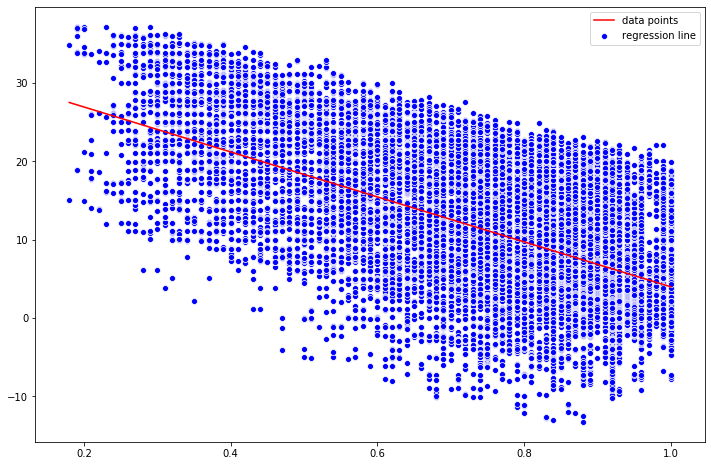

In [16]:
#plotting graph with regression line
plt.figure(figsize=(12,8))
sea.scatterplot(x=test_humidity,y=test_temp,color='blue',label='regression line')
sea.lineplot(x=test_humidity,y=predicted_temp, color = 'red',label="data points")
plt.legend()

In [17]:
#determining accuracy 
def accuracy( y_data_test, y_pred_test):
        total_error = 0 
        for i in range(0, len(y_data_test)): 
            total_error += abs((y_pred_test[i] - y_data_test[i]) / y_data_test[i]) 
            total_error = (total_error / len(y_data_test)) 
            accuracy = 1 - total_error 
            return accuracy.mean()*100

In [18]:
#determining accuracy and printing
accuracy(test_temp.tolist(), predicted_temp)

99.9980828863441